In [44]:
import numpy as np  
import pandas as pd 
from PIL import Image 

url = "https://cocl.us/datascience_survey_data"

df = pd.read_csv(url)
df.set_index(df.columns[0], inplace=True)
df.index.name = None
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [49]:
df_sort = df.sort_values('Very interested', ascending=False)
df_sort = ((df_sort/2233)*100).round(2)


In [47]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

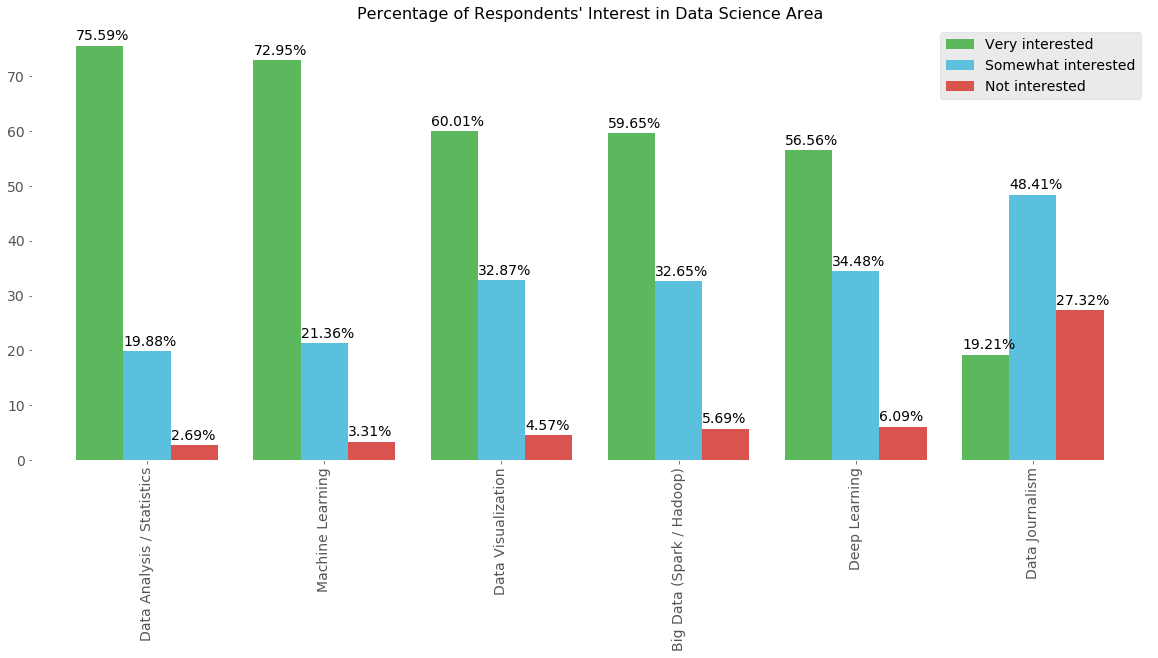

In [65]:
ax = df_sort.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(str(height)+'%', (p.get_x(), p.get_y() + height + 1), fontsize=14)
    
ax.legend(fontsize= 14)
ax.set_title('Percentage of Respondents\' Interest in Data Science Area', fontsize=16) 
ax.set_facecolor('White')

In [99]:
url = "https://cocl.us/sanfran_crime_dataset"

df = pd.read_csv(url)
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [100]:
df.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'Neighborhood', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [101]:
df_crime = df.groupby('Neighborhood').count()
df_crime['Count'] = df_crime['X']

In [103]:
df_crime.reset_index(inplace=True)

In [108]:
df1 = df_crime[['Neighborhood','Count']]

In [109]:
df1

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942
